In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import glob
from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Look pretty...
matplotlib.style.use('ggplot')
%matplotlib notebook

In [2]:
def doKMeans(df):
  # INFO: Plot your data with a '.' marker, with 0.3 alpha at the Longitude,
  # and Latitude locations in your dataset. Longitude = x, Latitude = y
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)
  plt.show()  
  # TODO: Filter df so that you're only looking at Longitude and Latitude,
  # since the remaining columns aren't really applicable for this purpose.
  df = df[['Latitude','Longitude']]


  # TODO: Use K-Means to try and find seven cluster centers in this df.
  kmeans = KMeans(n_clusters=7)
  kmeans.fit(df)  
  labels = kmeans.predict(df)
  #
  # INFO: Print and plot the centroids...
  centroids = kmeans.cluster_centers_
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
  print(centroids)
  plt.show()  
  

In [8]:
#
# TODO: Load your dataset after importing Pandas
#
# .. your code here ..
df = pd.read_csv('Datasets/Crimes_-_2001_to_present.csv')
print(len(df))
#
# TODO: Drop any ROWs with nans in them
#
df.dropna(inplace=True)
print(len(df))
#
#
print('---')
print(df.dtypes)


#
# Coerce the 'Date' feature (which is currently a string object) into real date,
# and confirm by re-printing the dtypes. NOTE: This is a slow process...
#
df.ix[:,'Date'] = pd.to_datetime(df.ix[:,'Date'] , errors='coerce')
print('----')
print(df.dtypes)


14004
12790
---
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object
----
ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                

<IPython.core.display.Javascript object>


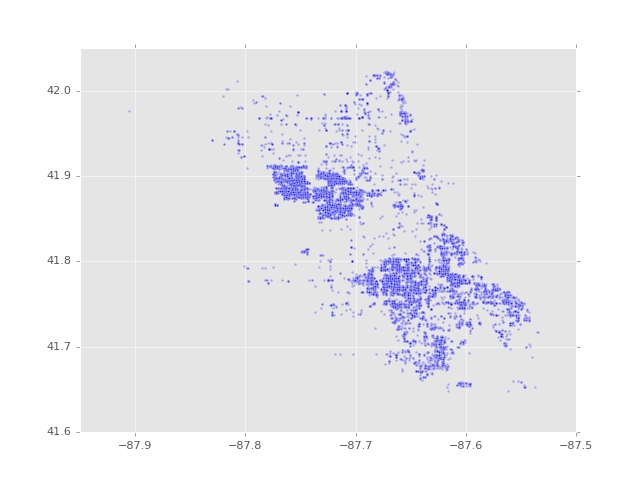

<IPython.core.display.Javascript object>


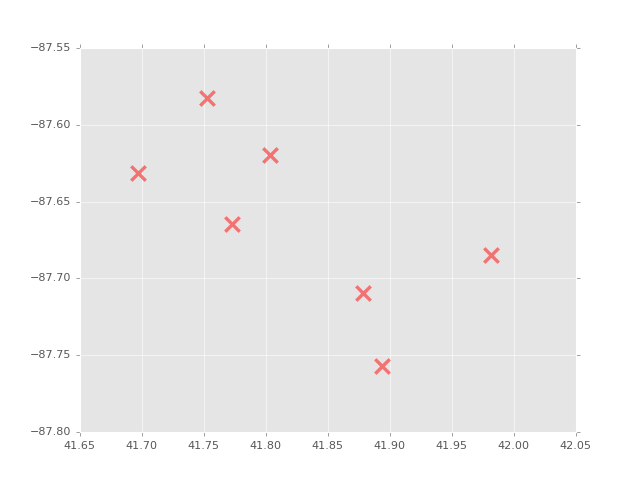

[[ 41.89346706 -87.75692069]
 [ 41.77285283 -87.66462843]
 [ 41.87812486 -87.70957047]
 [ 41.98183762 -87.684885  ]
 [ 41.69664674 -87.63121002]
 [ 41.7526161  -87.58256082]
 [ 41.80346895 -87.61945189]]


In [7]:
doKMeans(df)

In [5]:
#
# TODO: Filter out the data so that it only contains samples that have
# a Date > '2011-01-01', using indexing. Then, in a new figure, plot the
# crime incidents, as well as a new K-Means run's centroids.
#
# .. your code here ..
df1 = df[df['Date'] > '2011-01-01']


<IPython.core.display.Javascript object>


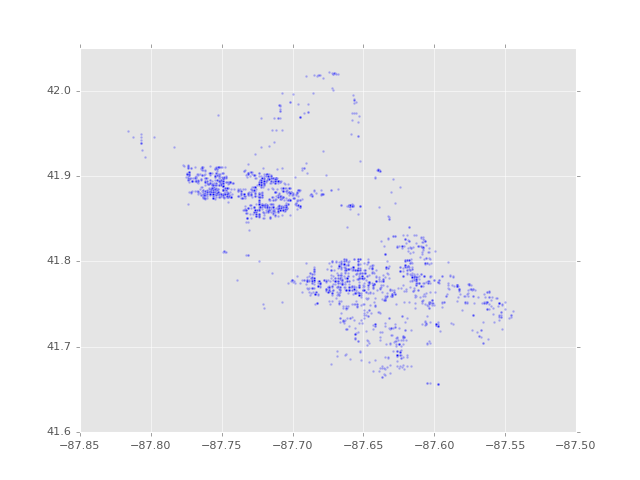

<IPython.core.display.Javascript object>


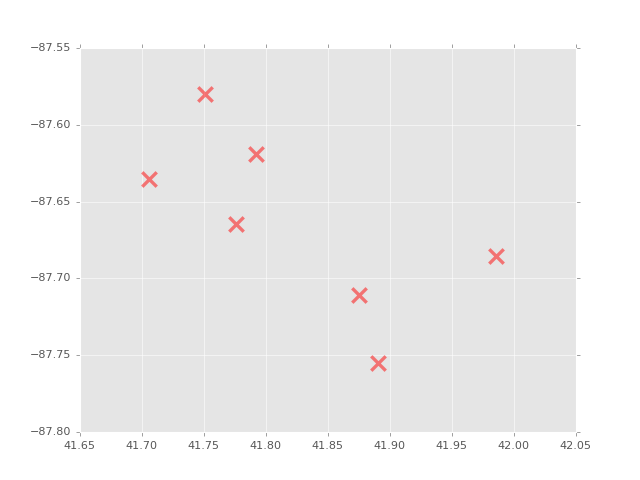

[[ 41.89006032 -87.75477531]
 [ 41.7761379  -87.66447499]
 [ 41.79213618 -87.61876239]
 [ 41.8750893  -87.71053351]
 [ 41.70544713 -87.6351828 ]
 [ 41.75068766 -87.5802589 ]
 [ 41.98536496 -87.68522419]]


In [9]:
doKMeans(df1)